In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#load the data
df_fifa=pd.read_excel("D://DATA ANALYSIS//FIFA-19-Data-Analysis-Project--main//FIFA-19-Data-Analysis-Project--main//Fifa2019Data.xlsx")



In [4]:
#look at the data
print(df_fifa)
df_fifa.columns
print(df_fifa.columns)


                  Name   Age Nationality  Overall  Potential  \
0             L. Messi  31.0   Argentina     94.0       94.0   
1    Cristiano Ronaldo  33.0    Portugal     94.0       94.0   
2            Neymar Jr  26.0      Brazil     92.0       93.0   
3               De Gea  27.0       Spain     91.0       93.0   
4         K. De Bruyne  27.0     Belgium     91.0       92.0   
..                 ...   ...         ...      ...        ...   
153            Rodrigo  27.0       Spain     83.0       84.0   
154              Pizzi  28.0    Portugal     83.0       83.0   
155           K. Kampl  27.0    Slovenia     83.0       83.0   
156               Neto  28.0      Brazil     83.0       84.0   
157         O. Baumann  28.0     Germany     83.0       84.0   

                    Club Preferred Foot Position  Jersey Number  Crossing  \
0           FC Barcelona           Left       RF             10      84.0   
1               Juventus          Right       ST              7      79.0   


In [5]:
#select the columns that we need
df=df_fifa[["Position","Overall","Finishing","ShortPassing","BallControl","Vision","Value"]]
print(df.columns)
print(df)


Index(['Position', 'Overall', 'Finishing', 'ShortPassing', 'BallControl',
       'Vision', 'Value'],
      dtype='object')
    Position  Overall  Finishing  ShortPassing  BallControl  Vision      Value
0         RF     94.0         95            90           96      94  110500000
1         ST     94.0         94            81           94      82   77000000
2         LW     92.0         87            84           95      87  118500000
3         GK     91.0         13            50           42      68   72000000
4        RCM     91.0         82            92           91      94  102000000
..       ...      ...        ...           ...          ...     ...        ...
153       ST     83.0         78            78           82      74   30500000
154      LCM     83.0         76            83           82      85   25500000
155      LCM     83.0         63            84           84      82   26500000
156       GK     83.0         15            36           24      42   21000000
157     

In [6]:
#check the data
df.describe()

,Overall,Finishing,ShortPassing,BallControl,Vision,Value
count,157.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02
mean,85.401274,61.075949,75.816456,75.284810,72.493671,4.014367e+07
std,2.420161,25.403883,14.903015,19.959862,14.304579,1.925452e+07
min,83.000000,9.000000,30.000000,14.000000,22.000000,4.000000e+06
25%,84.000000,44.250000,75.000000,73.000000,64.250000,2.850000e+07
50%,85.000000,71.000000,81.000000,83.000000,77.000000,3.450000e+07
75%,87.000000,80.750000,84.000000,86.000000,83.000000,4.637500e+07
max,94.000000,95.000000,93.000000,96.000000,94.000000,1.185000e+08


In [7]:
#clean the missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # ممكن تغير لـ "median"
df[["Overall", "Finishing", "ShortPassing", "BallControl", "Vision", "Value"]] = imputer.fit_transform(
    df[["Overall", "Finishing", "ShortPassing", "BallControl", "Vision", "Value"]]
)

print(df.describe())

          Overall   Finishing  ShortPassing  BallControl      Vision  \
count  158.000000  158.000000    158.000000   158.000000  158.000000   
mean    85.401274   61.075949     75.816456    75.284810   72.493671   
std      2.412441   25.403883     14.903015    19.959862   14.304579   
min     83.000000    9.000000     30.000000    14.000000   22.000000   
25%     84.000000   44.250000     75.000000    73.000000   64.250000   
50%     85.000000   71.000000     81.000000    83.000000   77.000000   
75%     87.000000   80.750000     84.000000    86.000000   83.000000   
max     94.000000   95.000000     93.000000    96.000000   94.000000   

              Value  
count  1.580000e+02  
mean   4.014367e+07  
std    1.925452e+07  
min    4.000000e+06  
25%    2.850000e+07  
50%    3.450000e+07  
75%    4.637500e+07  
max    1.185000e+08  


C:\Users\HP\AppData\Local\Temp\ipykernel_9212\2661130604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Overall", "Finishing", "ShortPassing", "BallControl", "Vision", "Value"]] = imputer.fit_transform(


In [8]:
#wrangle the data
df.drop(df.loc[df["Position"]=="GK"].index, inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9212\3463853307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.loc[df["Position"]=="GK"].index, inplace=True)


,Position,Overall,Finishing,ShortPassing,BallControl,Vision,Value
0,RF,94.0,95.0,90.0,96.0,94.0,110500000.0
1,ST,94.0,94.0,81.0,94.0,82.0,77000000.0
2,LW,92.0,87.0,84.0,95.0,87.0,118500000.0
4,RCM,91.0,82.0,92.0,91.0,94.0,102000000.0
5,LF,91.0,84.0,89.0,94.0,89.0,93000000.0
...,...,...,...,...,...,...,...
151,CB,83.0,37.0,73.0,72.0,65.0,19000000.0
152,RB,83.0,63.0,86.0,83.0,83.0,26500000.0
153,ST,83.0,78.0,78.0,82.0,74.0,30500000.0
154,LCM,83.0,76.0,83.0,82.0,85.0,25500000.0


In [9]:
#check the data again
df.describe()

,Overall,Finishing,ShortPassing,BallControl,Vision,Value
count,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02
mean,85.362319,68.007246,80.855072,82.188406,74.985507,4.102681e+07
std,2.404200,18.878597,6.407740,7.843869,12.831295,1.936339e+07
min,83.000000,10.000000,59.000000,57.000000,22.000000,4.200000e+06
25%,83.250000,57.000000,77.250000,79.250000,70.000000,2.962500e+07
50%,85.000000,73.000000,82.000000,83.500000,79.000000,3.525000e+07
75%,86.750000,82.000000,85.000000,87.000000,84.000000,4.912500e+07
max,94.000000,95.000000,93.000000,96.000000,94.000000,1.185000e+08


In [10]:
#Data wrangling
df["Value(m)"]=df["Value"]/1000000
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9212\2962736739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Value(m)"]=df["Value"]/1000000


,Position,Overall,Finishing,ShortPassing,BallControl,Vision,Value,Value(m)
0,RF,94.0,95.0,90.0,96.0,94.0,110500000.0,110.5
1,ST,94.0,94.0,81.0,94.0,82.0,77000000.0,77.0
2,LW,92.0,87.0,84.0,95.0,87.0,118500000.0,118.5
4,RCM,91.0,82.0,92.0,91.0,94.0,102000000.0,102.0
5,LF,91.0,84.0,89.0,94.0,89.0,93000000.0,93.0
...,...,...,...,...,...,...,...,...
151,CB,83.0,37.0,73.0,72.0,65.0,19000000.0,19.0
152,RB,83.0,63.0,86.0,83.0,83.0,26500000.0,26.5
153,ST,83.0,78.0,78.0,82.0,74.0,30500000.0,30.5
154,LCM,83.0,76.0,83.0,82.0,85.0,25500000.0,25.5


In [11]:
#Data wrangling
del df["Value"]
del df["Position"]

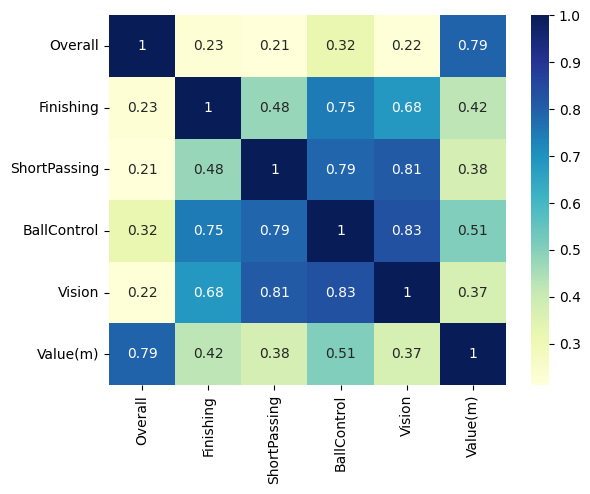

In [12]:
#correlation by Heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
plt.show()


In [13]:
#regression analysis
#"import the libraries"
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [14]:
r2=[]
MSE=[]
degree=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in degree:
    Input=[(('polynomial'), PolynomialFeatures(degree=i)), ('modal', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[["Overall","Finishing","ShortPassing","BallControl","Vision"]],df["Value(m)"])
    Yhat=pipe.predict(df[["Overall","Finishing","ShortPassing","BallControl","Vision"]])
    
    r2_value=r2_score(df["Value(m)"],Yhat)
    r2.append(r2_value)
    
    MSE_value=mean_squared_error(df["Value(m)"],Yhat)
    MSE.append(MSE_value)
    print (r2,MSE)

[0.7128727258302299] [106.87561838513037]
[0.7128727258302299, 0.7818279363628998] [106.87561838513037, 81.20884469438546]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868] [106.87561838513037, 81.20884469438546, 41.752493827035664]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416, 1.0] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384, 1.3876917926218992e-14]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416, 1.0, 1.0] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384, 1.3876917926218992e-14, 8.676242933279492e-16]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416, 1.0, 1.0, 1.0] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384, 1.387691792

In [15]:
#we will choose the 4th degree because it has the highest R2 and lowest MSE
Input=[(('polynomial'), PolynomialFeatures(degree=4)), ('mode', linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[["Overall","Finishing","ShortPassing","BallControl","Vision"]],df["Value(m)"])
Yhat=pipe.predict(df[["Overall","Finishing","ShortPassing","BallControl","Vision"]])

In [16]:
#Contunue the analysis
result_final=pd.DataFrame({"Overall":df["Overall"],"Finishing":df["Finishing"],"ShortPassing":df["ShortPassing"],"BallControl":df["BallControl"],"Vision":df["Vision"],"Actual Value(m)":df["Value(m)"],"Predicted Value(m)":Yhat})
result_final

,Overall,Finishing,ShortPassing,BallControl,Vision,Actual Value(m),Predicted Value(m)
0,94.0,95.0,90.0,96.0,94.0,110.5,110.628220
1,94.0,94.0,81.0,94.0,82.0,77.0,76.986955
2,92.0,87.0,84.0,95.0,87.0,118.5,118.357004
4,91.0,82.0,92.0,91.0,94.0,102.0,101.969657
5,91.0,84.0,89.0,94.0,89.0,93.0,91.574421
...,...,...,...,...,...,...,...
151,83.0,37.0,73.0,72.0,65.0,19.0,18.705695
152,83.0,63.0,86.0,83.0,83.0,26.5,26.678740
153,83.0,78.0,78.0,82.0,74.0,30.5,36.961368
154,83.0,76.0,83.0,82.0,85.0,25.5,25.665974


In [17]:
#read the dataset of New players
df_new=pd.read_excel("D://DATA ANALYSIS//FIFA-19-Data-Analysis-Project--main//FIFA-19-Data-Analysis-Project--main//new_players.xlsx")
del df_new ["Dribbling"]
df_new

,Name,Overall,Finishing,ShortPassing,BallControl,Vision
0,Ronaldo,92,99,80,89,80
1,Kaka,88,90,90,87,94
2,Beckham,87,88,95,85,95
3,Henry,90,95,86,87,90


In [18]:
#predict the new values of new players
value_pred=pipe.predict(df_new[["Overall","Finishing","ShortPassing","BallControl","Vision"]])
value_pred

array([ 348.66008835, -217.97475963, -602.26530845, -147.25425446])

In [19]:
#check the results
r2_new=[]
MSE_new=[]
degree=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in degree:
    Input=[(('polynomial'), PolynomialFeatures(degree=i)), ('modal', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[["Overall"]],df["Value(m)"])
    Yhat_new=pipe.predict(df[["Overall"]])
    
    r2_value=r2_score(df["Value(m)"],Yhat_new)
    r2_new.append(r2_value)
    
    MSE_value=mean_squared_error(df["Value(m)"],Yhat_new)
    MSE_new.append(MSE_value)
    print (r2,MSE)

[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384, 1.3876917926218992e-14, 8.676242933279492e-16, 7.505701925534136e-17, 3.460363790103357e-17, 6.231884856490982e-18, 1.0564227226018173e-17, 1.677306299762733e-18, 4.920717568147463e-19, 2.0150171147698761e-19, 2.6226563907114363e-19, 1.3546353784674913e-19, 1.702883858063009e-19, 4.841486891138284e-20, 2.687184718333483e-20, 2.2321438198394545e-20, 7.455235292834511e-21]
[0.7128727258302299, 0.7818279363628998, 0.8878296104996868, 0.9832918983563416, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [106.87561838513037, 81.20884469438546, 41.752493827035664, 6.2191538591063384, 1.3876917926218992e-14, 8.676242933279492e-16, 7.505701925534136e-17, 3.460363790103357e-17, 6.231884856490982e-18, 1.0564227226018173e-17, 1.67

In [20]:
#compare the results
result_new=pd.DataFrame({"Ovarall":df["Overall"],"Actual value":df["Value(m)"],"Predicted value":Yhat_new})
result_new

,Ovarall,Actual value,Predicted value
0,94.0,110.5,95.517852
1,94.0,77.0,95.517852
2,92.0,118.5,94.475669
4,91.0,102.0,86.992024
5,91.0,93.0,86.992024
...,...,...,...
151,83.0,19.0,29.875631
152,83.0,26.5,29.875631
153,83.0,30.5,29.875631
154,83.0,25.5,29.875631


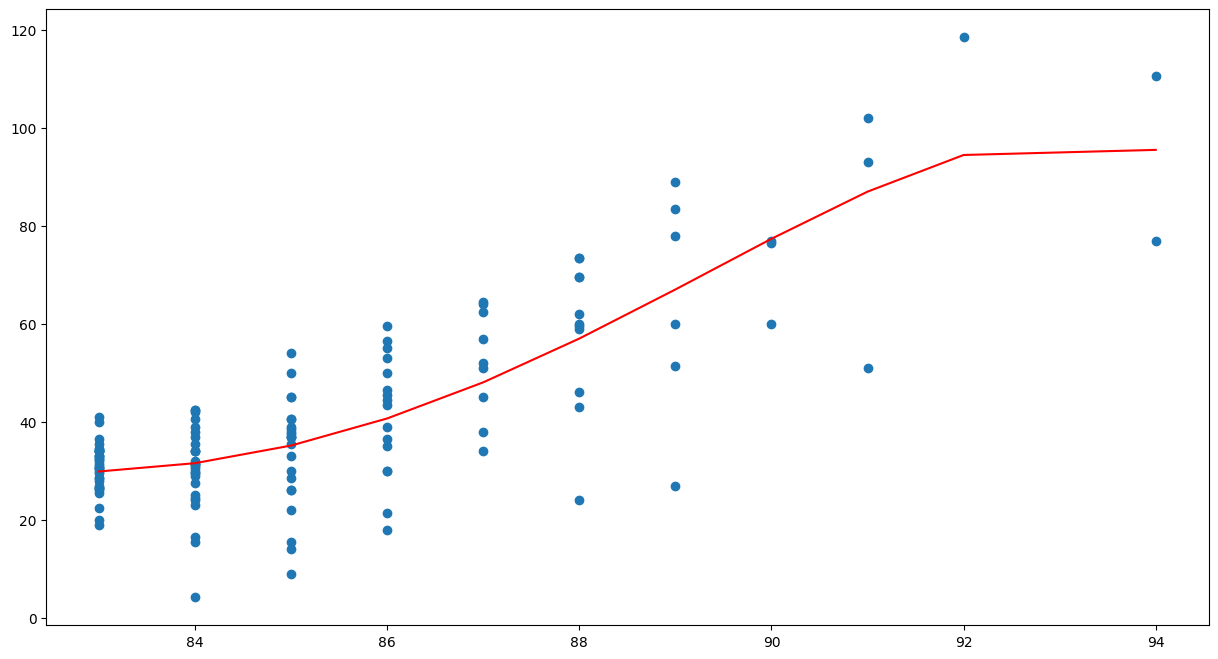

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(df["Overall"],df["Value(m)"])
plt.plot(df["Overall"],Yhat_new,color="r")

In [22]:
#check the results
r2_new2=[]
MSE_new2=[]
degree=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in degree:
    Input=[(('polynomial'), PolynomialFeatures(degree=i)), ('modal', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[["Overall","BallControl"]],df["Value(m)"])
    Yhat_new2=pipe.predict(df[["Overall","BallControl"]])
    
    r2_value=r2_score(df["Value(m)"],Yhat_new2)
    r2_new2.append(r2_value)  # Append to r2_new2 instead of r2_new
    
    MSE_value=mean_squared_error(df["Value(m)"],Yhat_new2)
    MSE_new2.append(MSE_value)
    
print(max(r2_new2))
print(r2_new2.index(max(r2_new2)))



0.8397354348812367
19


In [23]:

# Display result_new2
result_new2=pd.DataFrame({"Overall":df["Overall"],"Finishing":df["Finishing"],"ShortPassing":df["ShortPassing"],"BallControl":df["BallControl"],"Vision":df["Vision"],"Actual Value(m)":df["Value(m)"],"Predicted Value(m)":Yhat})
result_new2

,Overall,Finishing,ShortPassing,BallControl,Vision,Actual Value(m),Predicted Value(m)
0,94.0,95.0,90.0,96.0,94.0,110.5,110.628220
1,94.0,94.0,81.0,94.0,82.0,77.0,76.986955
2,92.0,87.0,84.0,95.0,87.0,118.5,118.357004
4,91.0,82.0,92.0,91.0,94.0,102.0,101.969657
5,91.0,84.0,89.0,94.0,89.0,93.0,91.574421
...,...,...,...,...,...,...,...
151,83.0,37.0,73.0,72.0,65.0,19.0,18.705695
152,83.0,63.0,86.0,83.0,83.0,26.5,26.678740
153,83.0,78.0,78.0,82.0,74.0,30.5,36.961368
154,83.0,76.0,83.0,82.0,85.0,25.5,25.665974


In [24]:
#prediction values of new players 

Input=[('polyominal', PolynomialFeatures(degree=20)), ('mode', linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[["Overall","BallControl"]],df["Value(m)"])
value_pred2=pipe.predict(df_new[["Overall","BallControl"]])
value_pred2


array([99.49056434, 50.63006019, 40.94838905, 85.52495765])

In [25]:
#Append the predicted values to New players 
result_pred=df_new.join(pd.DataFrame({"Values":value_pred2}))
result_pred

,Name,Overall,Finishing,ShortPassing,BallControl,Vision,Values
0,Ronaldo,92,99,80,89,80,99.490564
1,Kaka,88,90,90,87,94,50.630060
2,Beckham,87,88,95,85,95,40.948389
3,Henry,90,95,86,87,90,85.524958


In [26]:
#finally export to excile file
result_pred.to_excel("Final_result.xlsx")